In [ ]:
# Task 1- EDA

In [ ]:
# Performing a comprehensive Exploratory Data Analysis(EDA) on the 'World_development_mesurement.xlsx'

In [ ]:
# Loading the Dataset

In [ ]:
import pandas as pd
data=pd.read_excel("World_development_mesurement.xlsx")
data

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  ...  \
0         $54,790,058,957             0.035               $60  ...   
1          $9,129,594,819             0.034               $22  ...   
2          $2,359,122,303             0.043               $15  ...   
3          $5,788,311,645             0.047              $152  ...   
4          $2,610,959,139             0.051               $12  ...   
...                   ...               ...               ...  ...   
2699                  NaN               NaN               NaN  ...   
2700  $16,244,600,000,000             0.179            $8,895  ...   
2701      $50,004,354,667             0.089            $1,308  ...   
2702     $381,286,223,859             0.046              $593  ...   
2703                  NaN               NaN               NaN  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
27

In [ ]:
# Descriptive statistics

print("Data Info:")
data.info()

print("\nDescription Statictics for Numerical columns: ")
data.describe()

print("Value Counts of Data:")
data['Country'].value_counts()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 

Country
Algeria                     13
Angola                      13
Benin                       13
Botswana                    13
Burkina Faso                13
                            ..
Turks and Caicos Islands    13
United States               13
Uruguay                     13
Venezuela, RB               13
Virgin Islands (U.S.)       13
Name: count, Length: 208, dtype: int64

In [ ]:
# Analyzing Missing Values for imputaion or removal

missing_values=data.isnull().sum()
print("Missing Values in each column:")
print(missing_values)

Missing Values in each column:
Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64


In [ ]:
# Handling missing values and cleaning the data
print('Original number of missing values per column:')
print(data.isnull().sum()[data.isnull().sum() > 0])

# Calculate missing percentages
missing_percentage = data.isnull().sum() / len(data) * 100

# Drop columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index.tolist()
data = data.drop(columns=columns_to_drop)
print(f"\nDropped columns with more than 40% missing values: {columns_to_drop}")

# Function to clean and convert currency/string columns to numeric
def clean_currency(series):
    if series.dtype == 'object':
        return series.astype(str).str.replace('$', '').str.replace(',', '', regex=False).astype(float, errors='ignore')
    return series

# Apply cleaning to relevant columns
data['GDP'] = clean_currency(data['GDP'])
data['Health Exp/Capita'] = clean_currency(data['Health Exp/Capita'])
data['Tourism Inbound'] = clean_currency(data['Tourism Inbound'])
data['Tourism Outbound'] = clean_currency(data['Tourism Outbound'])

# Impute remaining numerical columns with the median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    if data[col].isnull().any():
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)

print('\nMissing values after processing:')
print(data.isnull().sum()[data.isnull().sum() > 0])

Original number of missing values per column:
Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

Dropped columns with more than 40% missing values: ['Business Tax Rate', 'Ease of Business', 'Hours to do Tax']

Missing values after processing:
Series([], dtype: int64)


/tmp/ipython-input-3654451858.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)


In [ ]:
# Outlier Detection

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical columns identified for outlier detection:")
print(numerical_cols)

Numerical columns identified for outlier detection:
['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban', 'Tourism Inbound', 'Tourism Outbound']


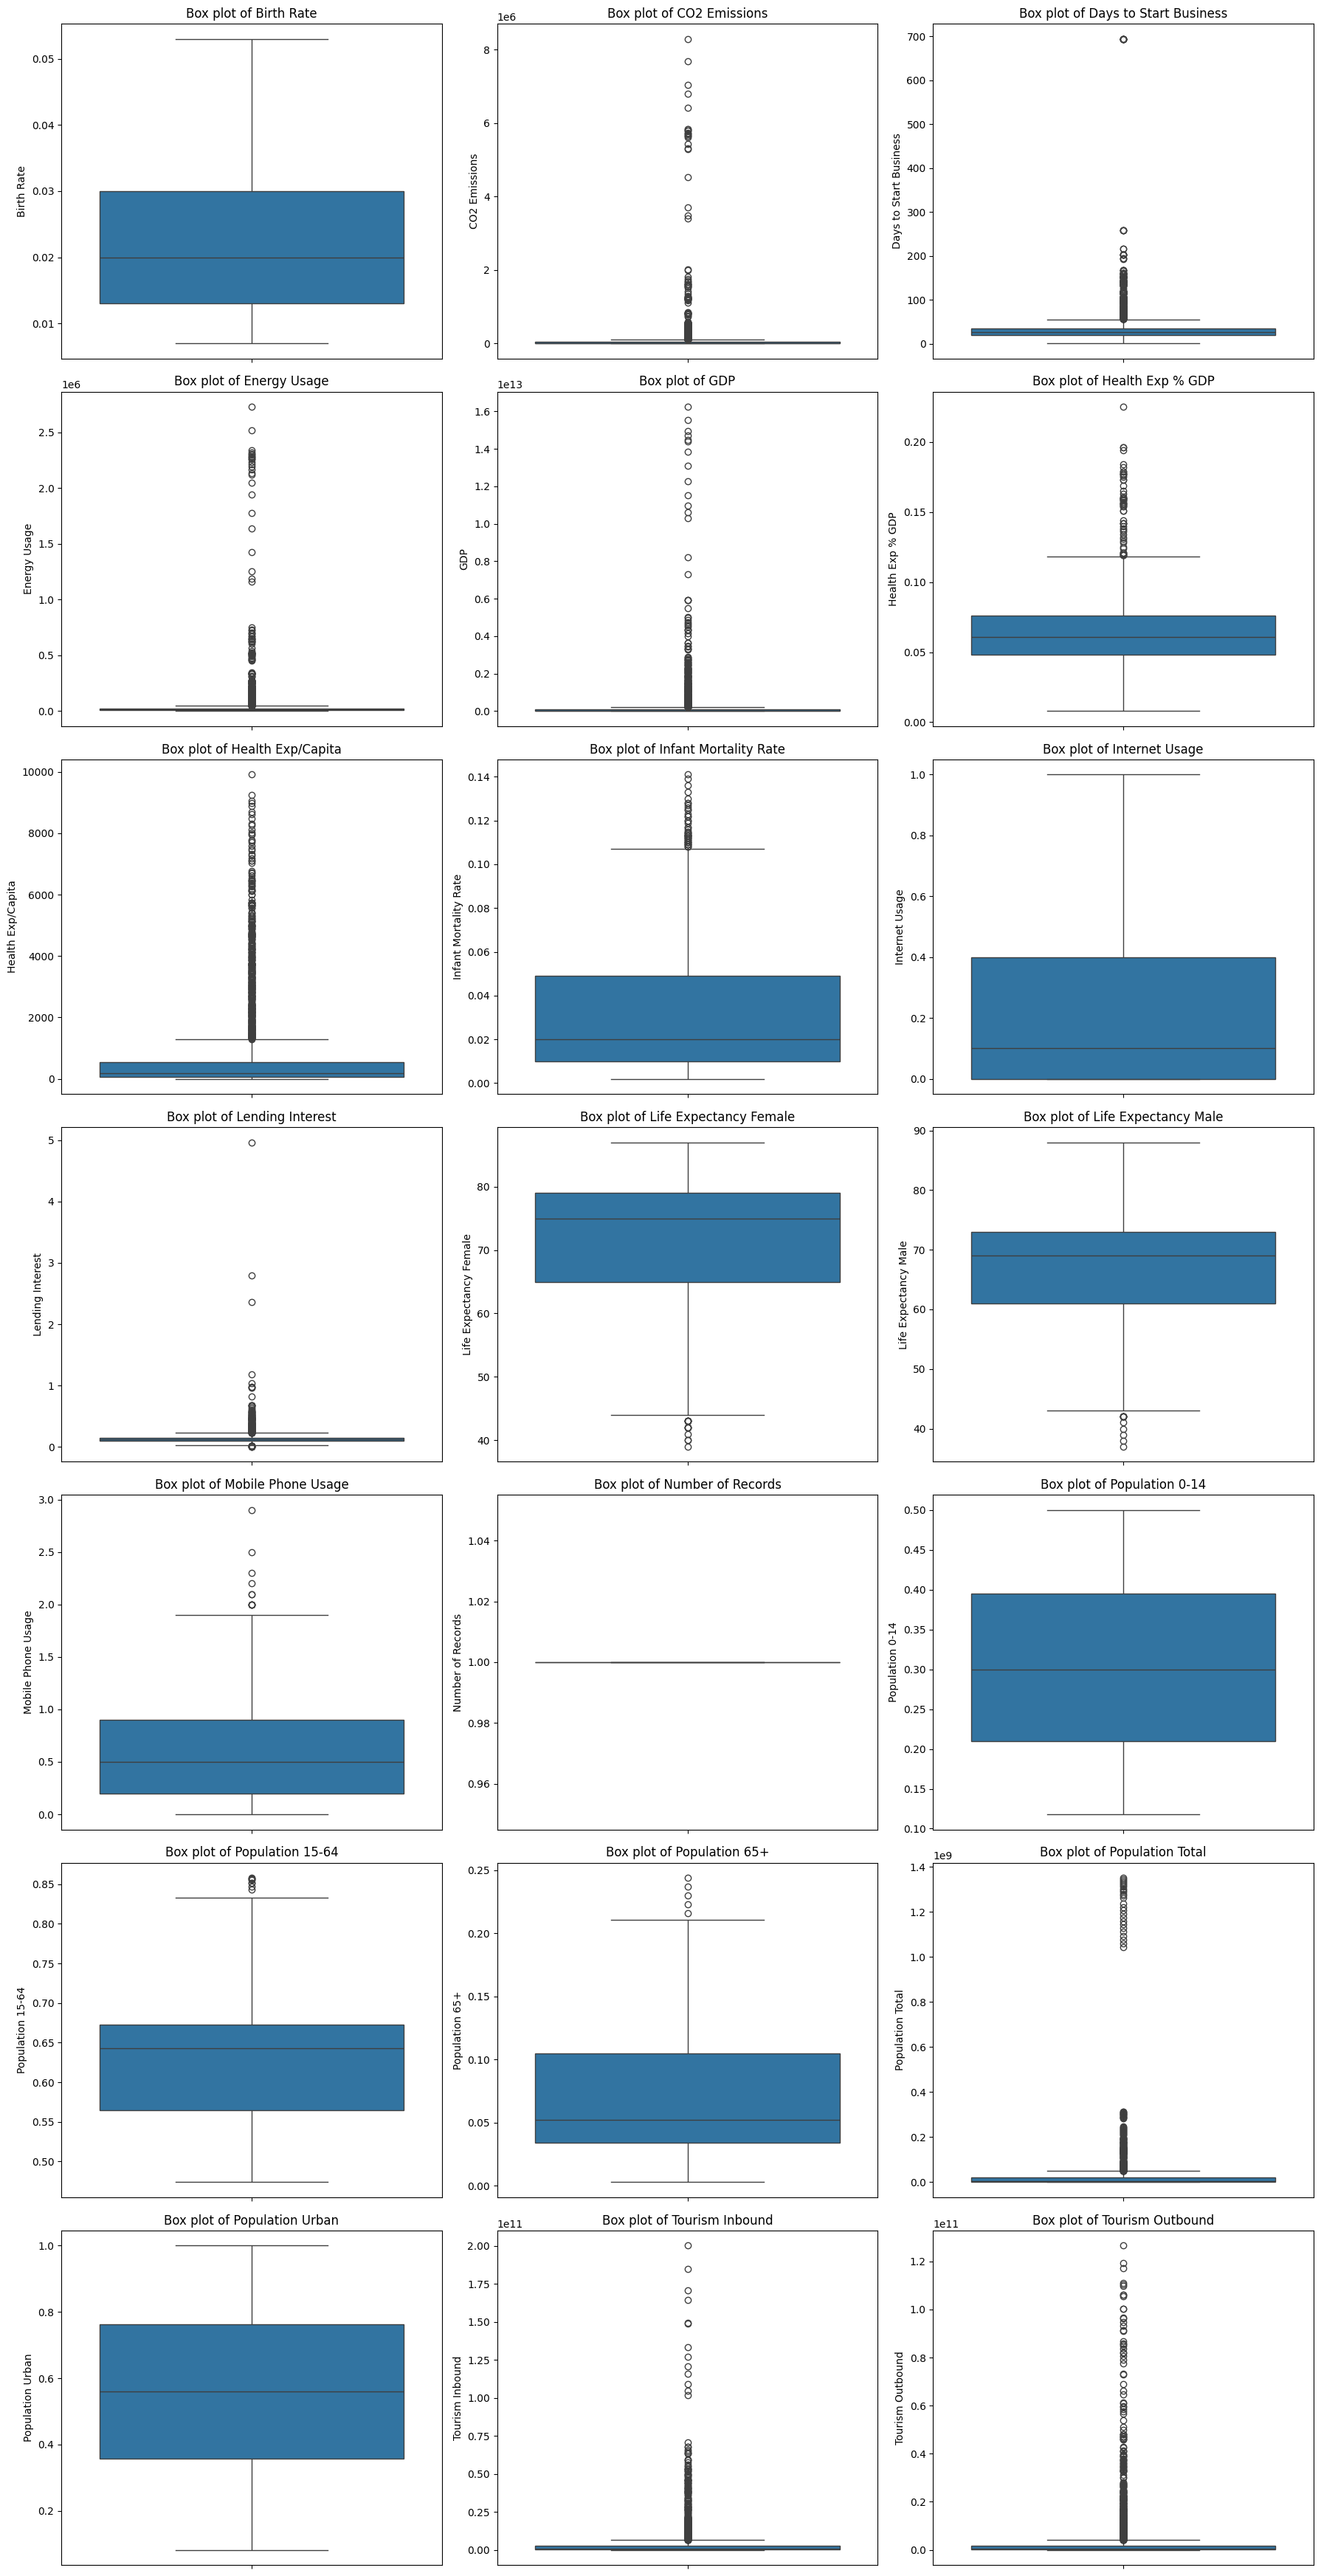

In [ ]:
# Using Boxplot for showing Outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = len(numerical_cols)

# Calculate number of rows and columns for subplots
n_rows = math.ceil(num_cols / 3)  # Roughly 3 plots per row
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Reasoning**:
The previous step successfully visualized outliers using box plots for all numerical columns. Now, I will proceed to cap these identified outliers using the IQR method, which involves calculating Q1, Q3, and IQR, then setting upper and lower bounds for each numerical column and replacing values outside these bounds with the respective caps.



In [ ]:
# Using Whisker Length for outlier handling
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped for all numerical columns using the IQR method.")


Outliers capped for all numerical columns using the IQR method.


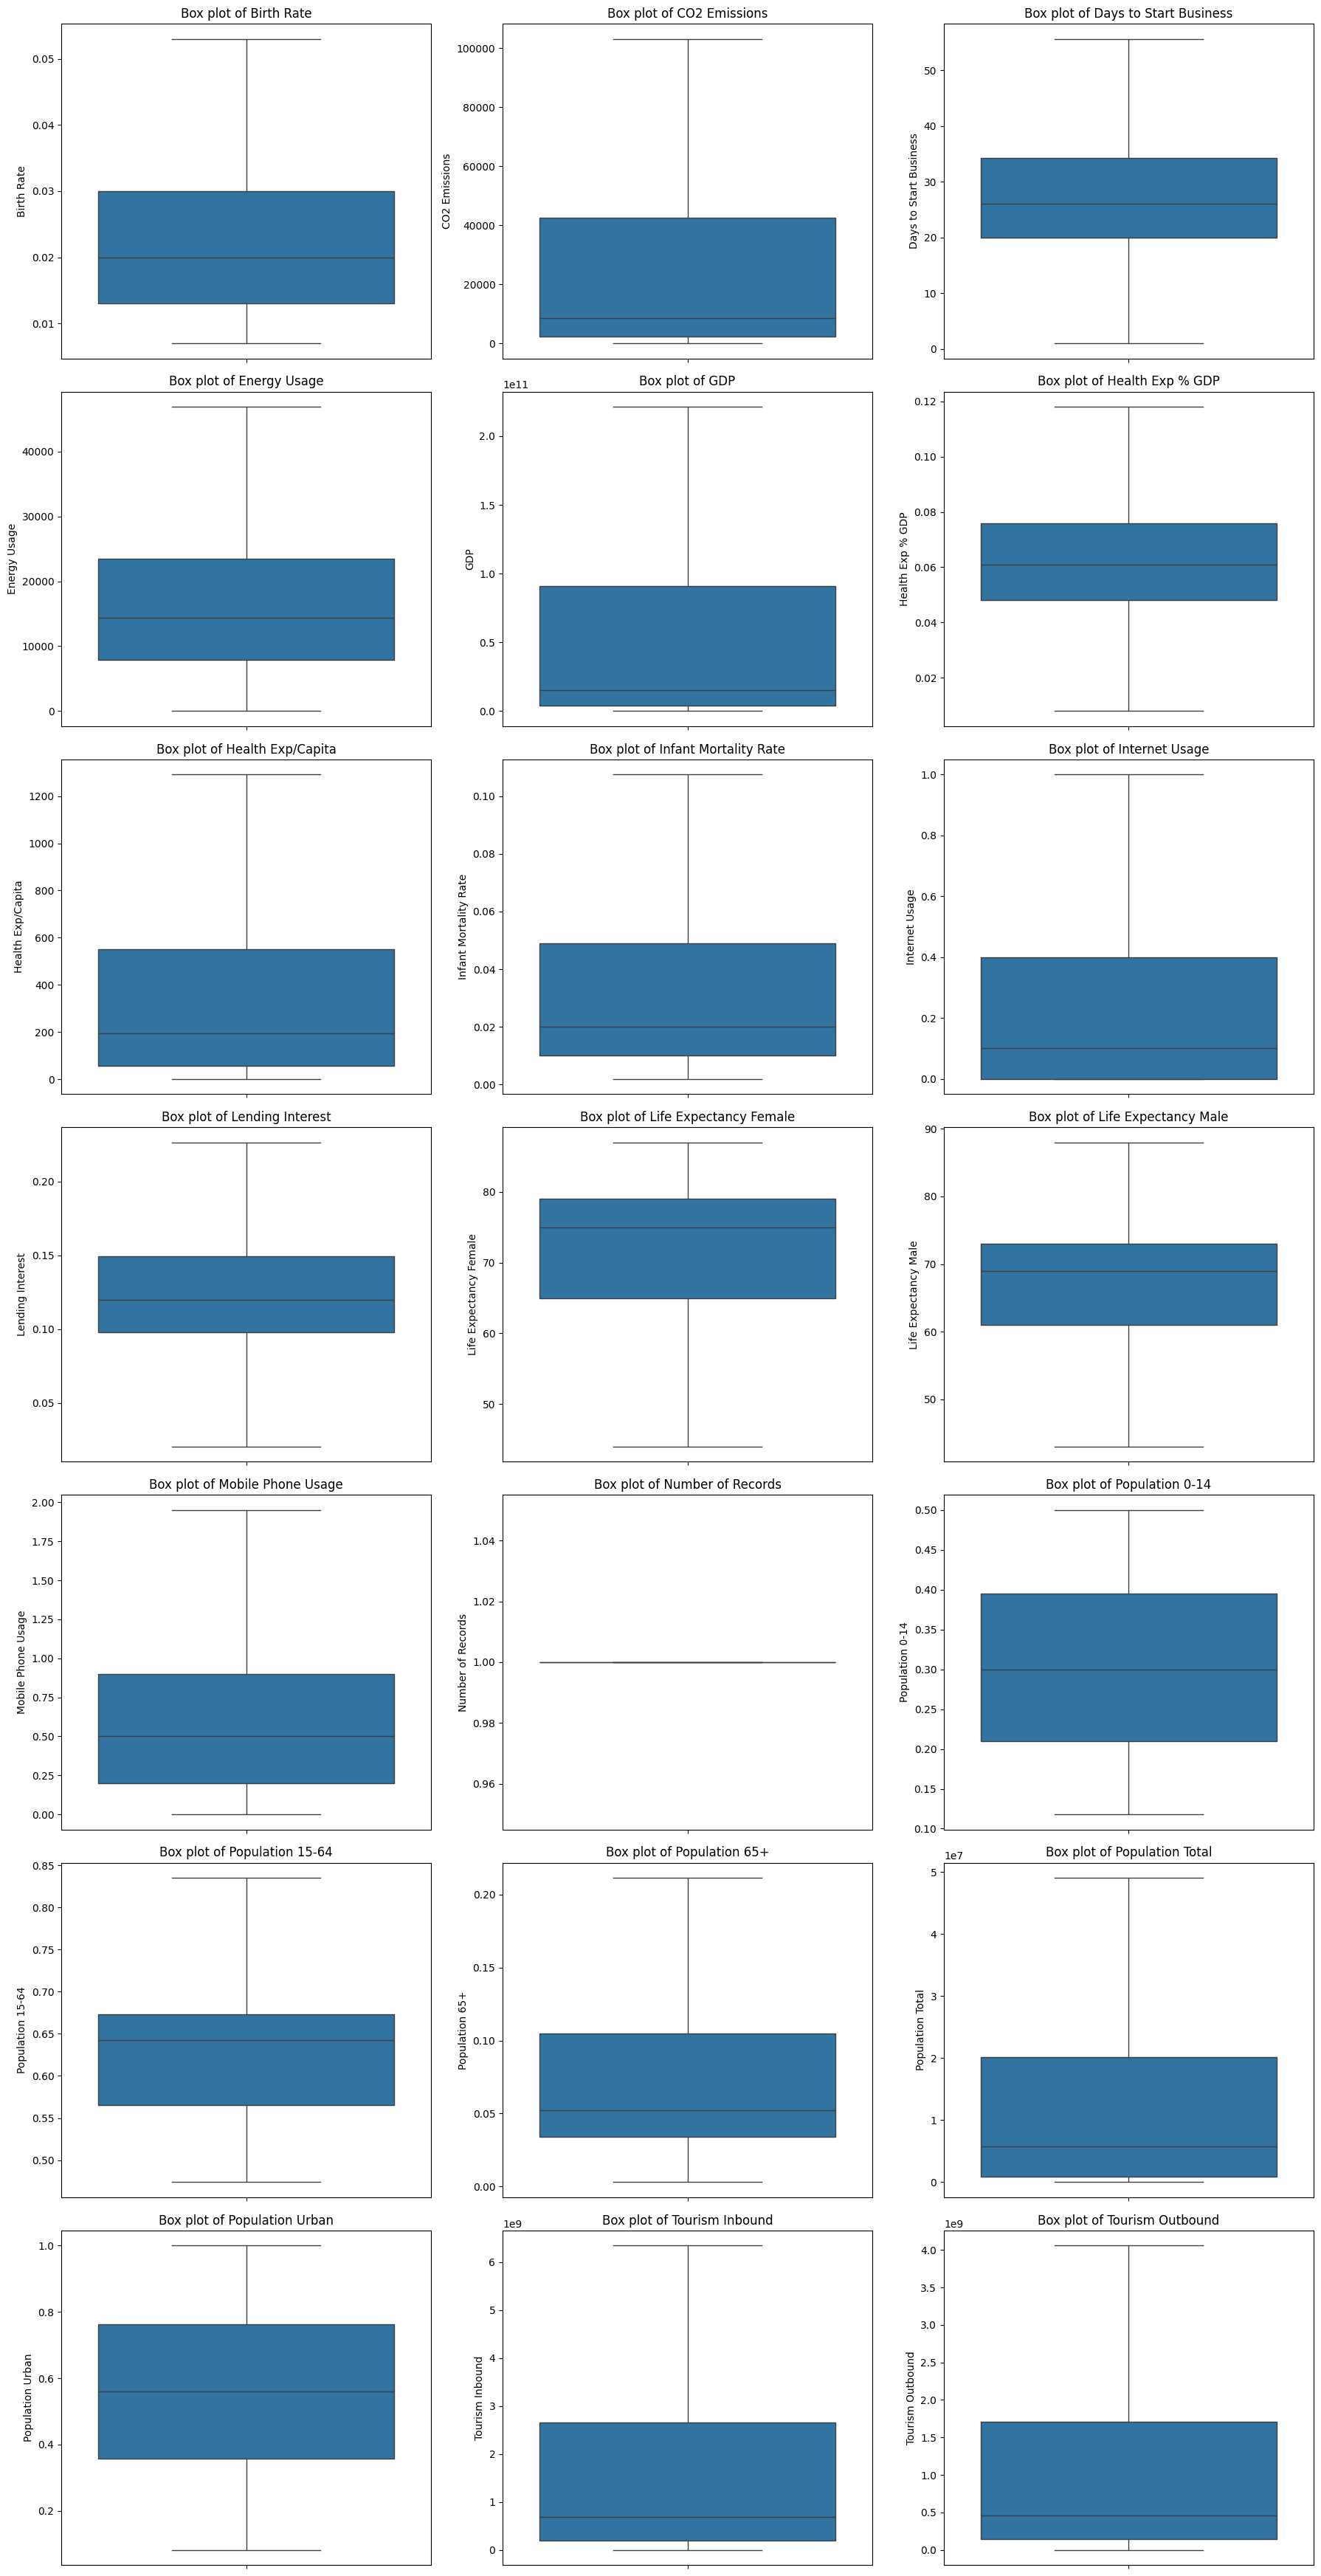

In [ ]:
num_cols_to_plot = len(numerical_cols)

# Calculate number of rows and columns for subplots
n_rows = math.ceil(num_cols_to_plot / 3)  # Roughly 3 plots per row
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Checking for the duplicates and removing them if necessary.
initial_rows = data.shape[0]
data.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - data.shape[0]

if duplicates_removed > 0:
    print(f"Successfully removed {duplicates_removed} duplicate rows.")
    print(f"The dataset now has {data.shape[0]} rows and {data.shape[1]} columns.")
else:
    print("No duplicate rows were found in the dataset.")

No duplicate rows were found in the dataset.


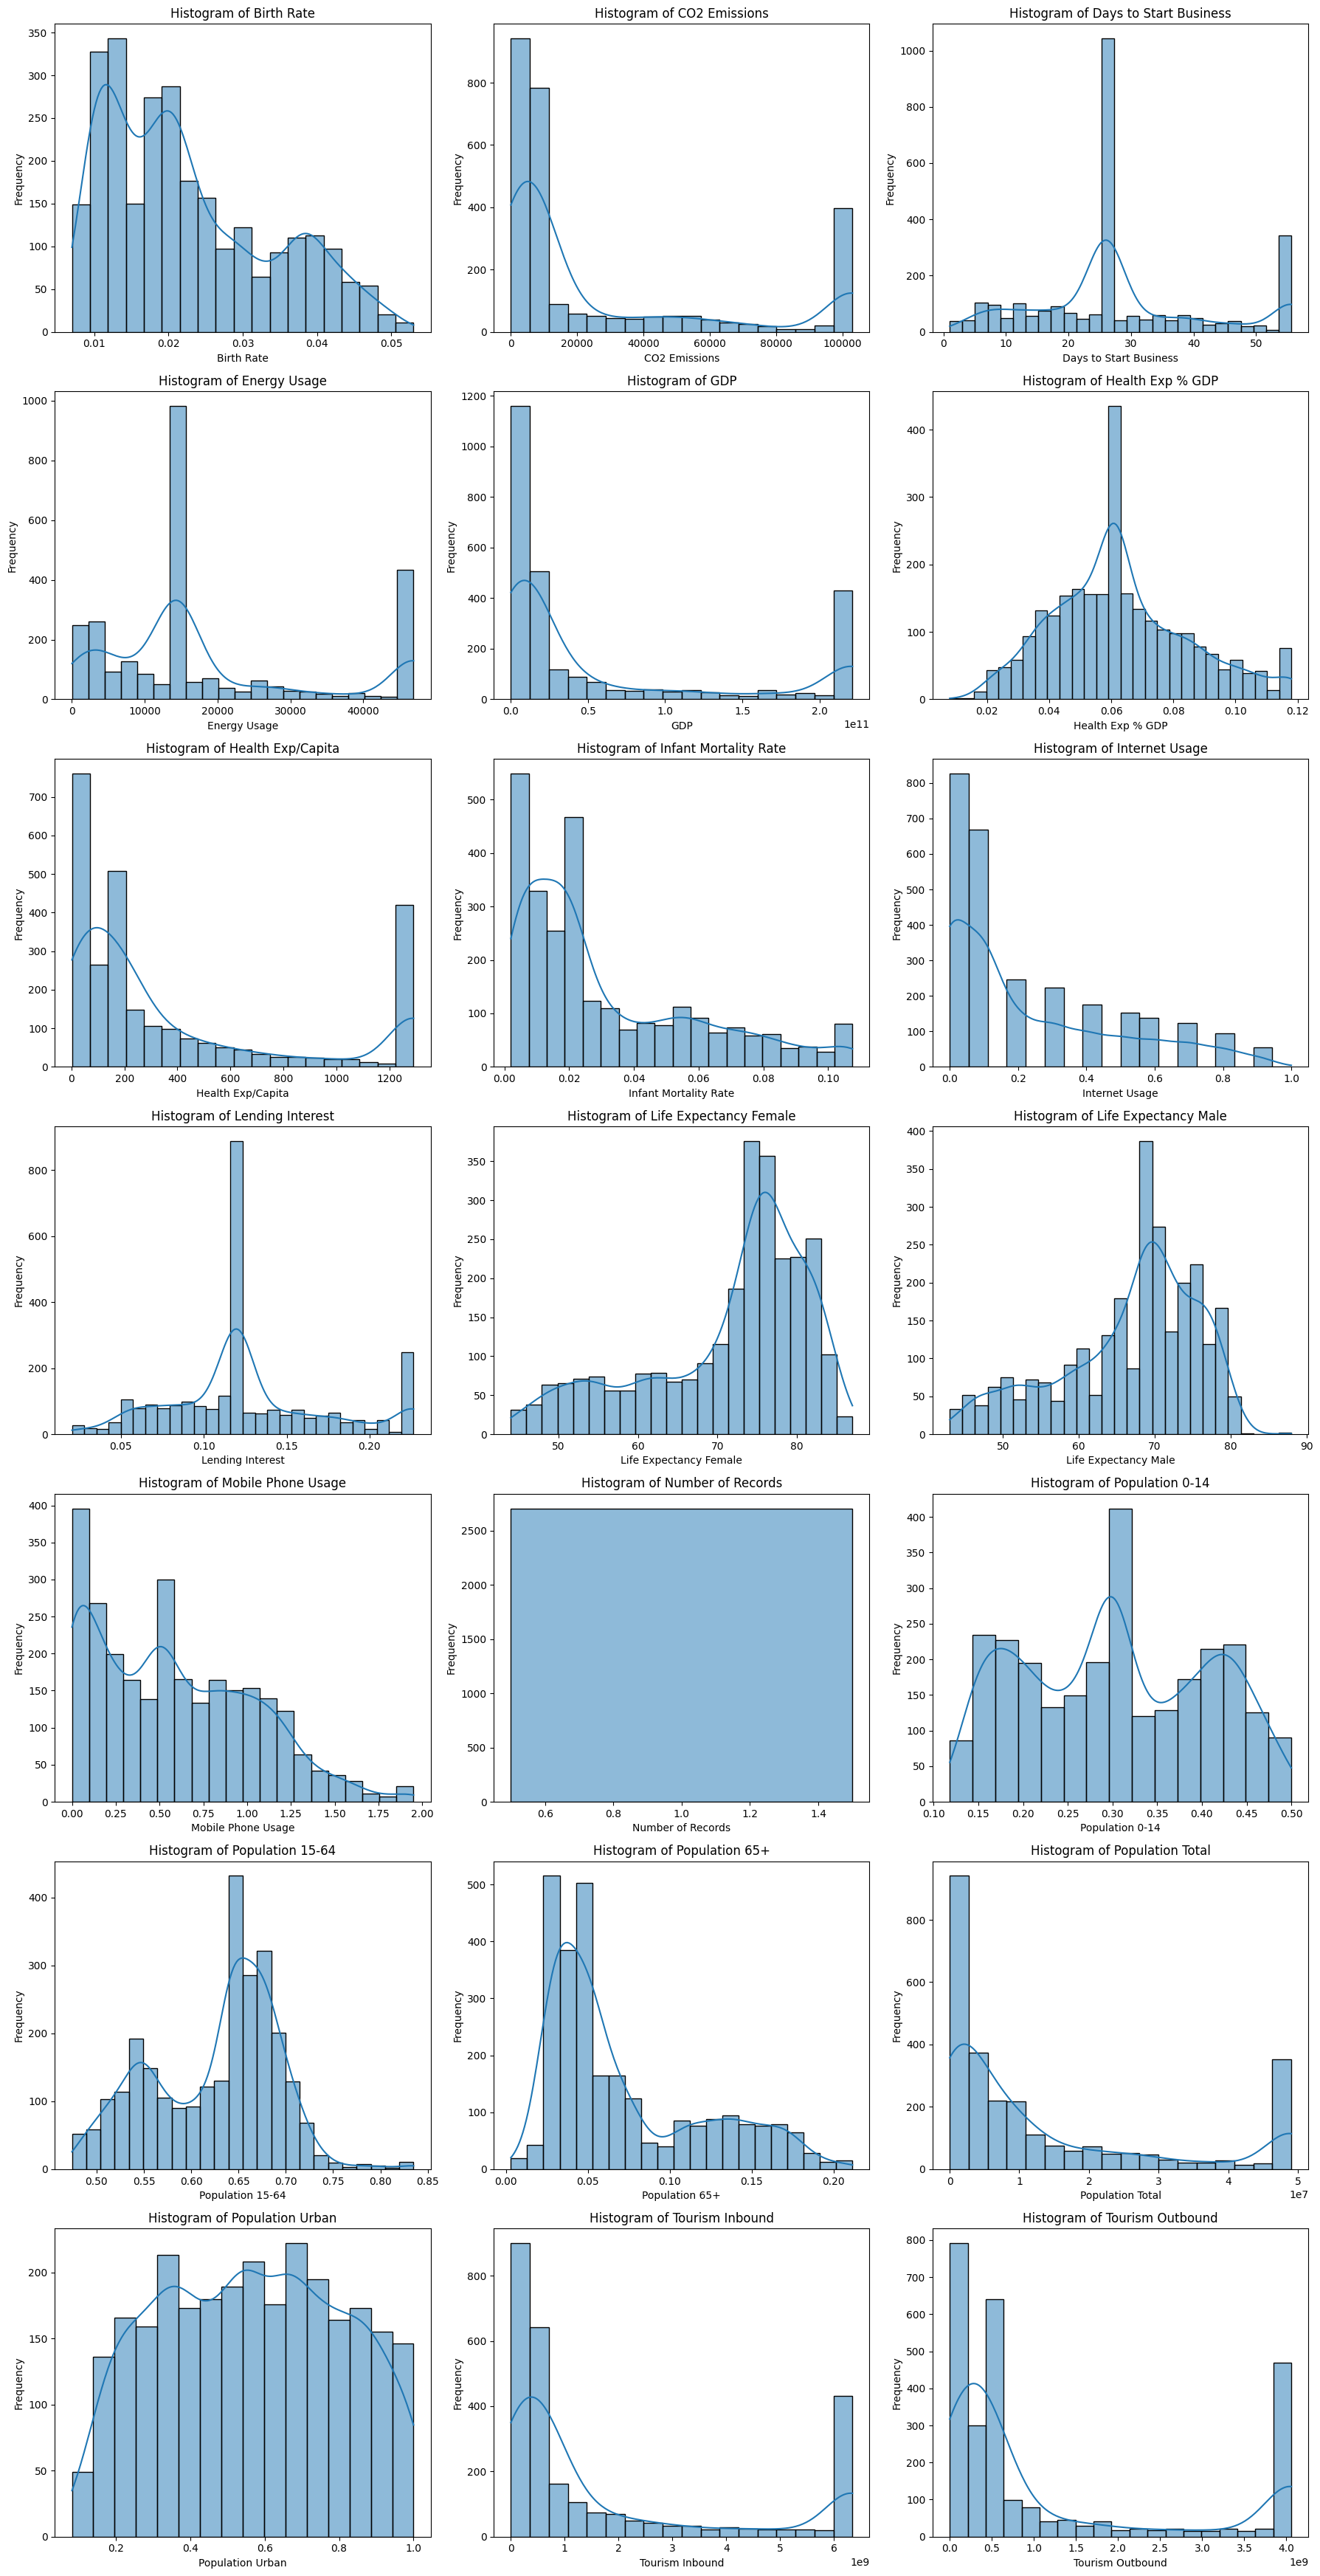

In [ ]:
# Data Visualization

# Using Histogram for the univariant columns

num_cols = len(numerical_cols)

# Calculate number of rows and columns for subplots
n_rows = math.ceil(num_cols / 3)
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

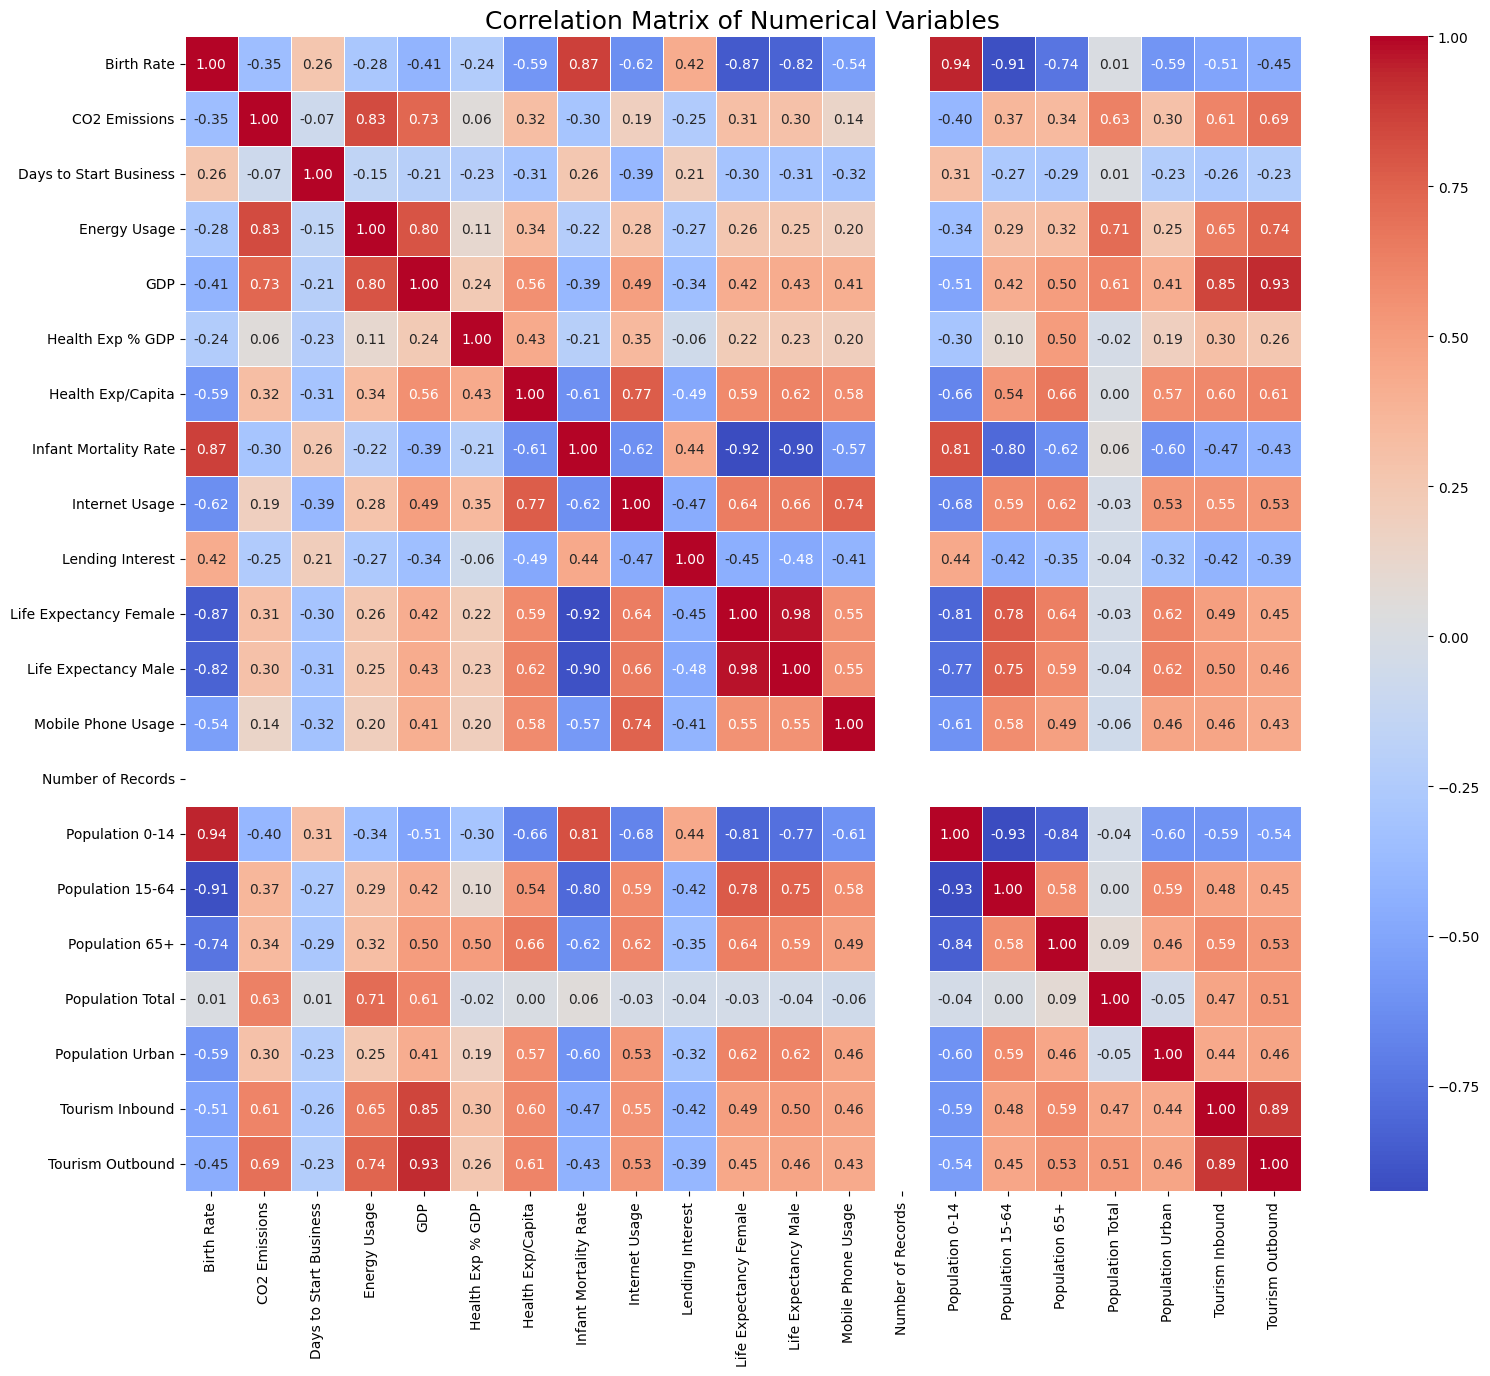

In [ ]:
# Visuation of Correlation Matrix of Numerical Columns

correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=18)
plt.show()

In [ ]:
# Performing the Scatter Plot between highly correlated Varibles
# If we perform scatter plot between all numerical variables,then it could result in a large number of plots, which might be overwhelming.

In [ ]:
# Using Scatter plot for the highly correlated columns or features.

import numpy as np
abs_corr = correlation_matrix.abs()

# Extract the upper triangle of the absolute correlation matrix
upper_triangle = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))

# Stack the upper triangle to convert it into a Series and drop NaN values
stacked_corr = upper_triangle.stack().sort_values(ascending=False)

# Identify the top 3 positively correlated pairs
top_positive_pairs = stacked_corr.head(3)
print("\nTop 3 Positively Correlated Pairs:")
print(top_positive_pairs)

# Identify the top 3 negatively correlated pairs (from the original correlation matrix)
upper_triangle_original = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
stacked_corr_original = upper_triangle_original.stack().sort_values(ascending=True)
top_negative_pairs = stacked_corr_original.head(3)
print("\nTop 3 Negatively Correlated Pairs:")
print(top_negative_pairs)


Top 3 Positively Correlated Pairs:
Life Expectancy Female  Life Expectancy Male    0.976817
Birth Rate              Population 0-14         0.941822
GDP                     Tourism Outbound        0.931593
dtype: float64

Top 3 Negatively Correlated Pairs:
Population 0-14        Population 15-64         -0.925740
Infant Mortality Rate  Life Expectancy Female   -0.924283
Birth Rate             Population 15-64         -0.908345
dtype: float64


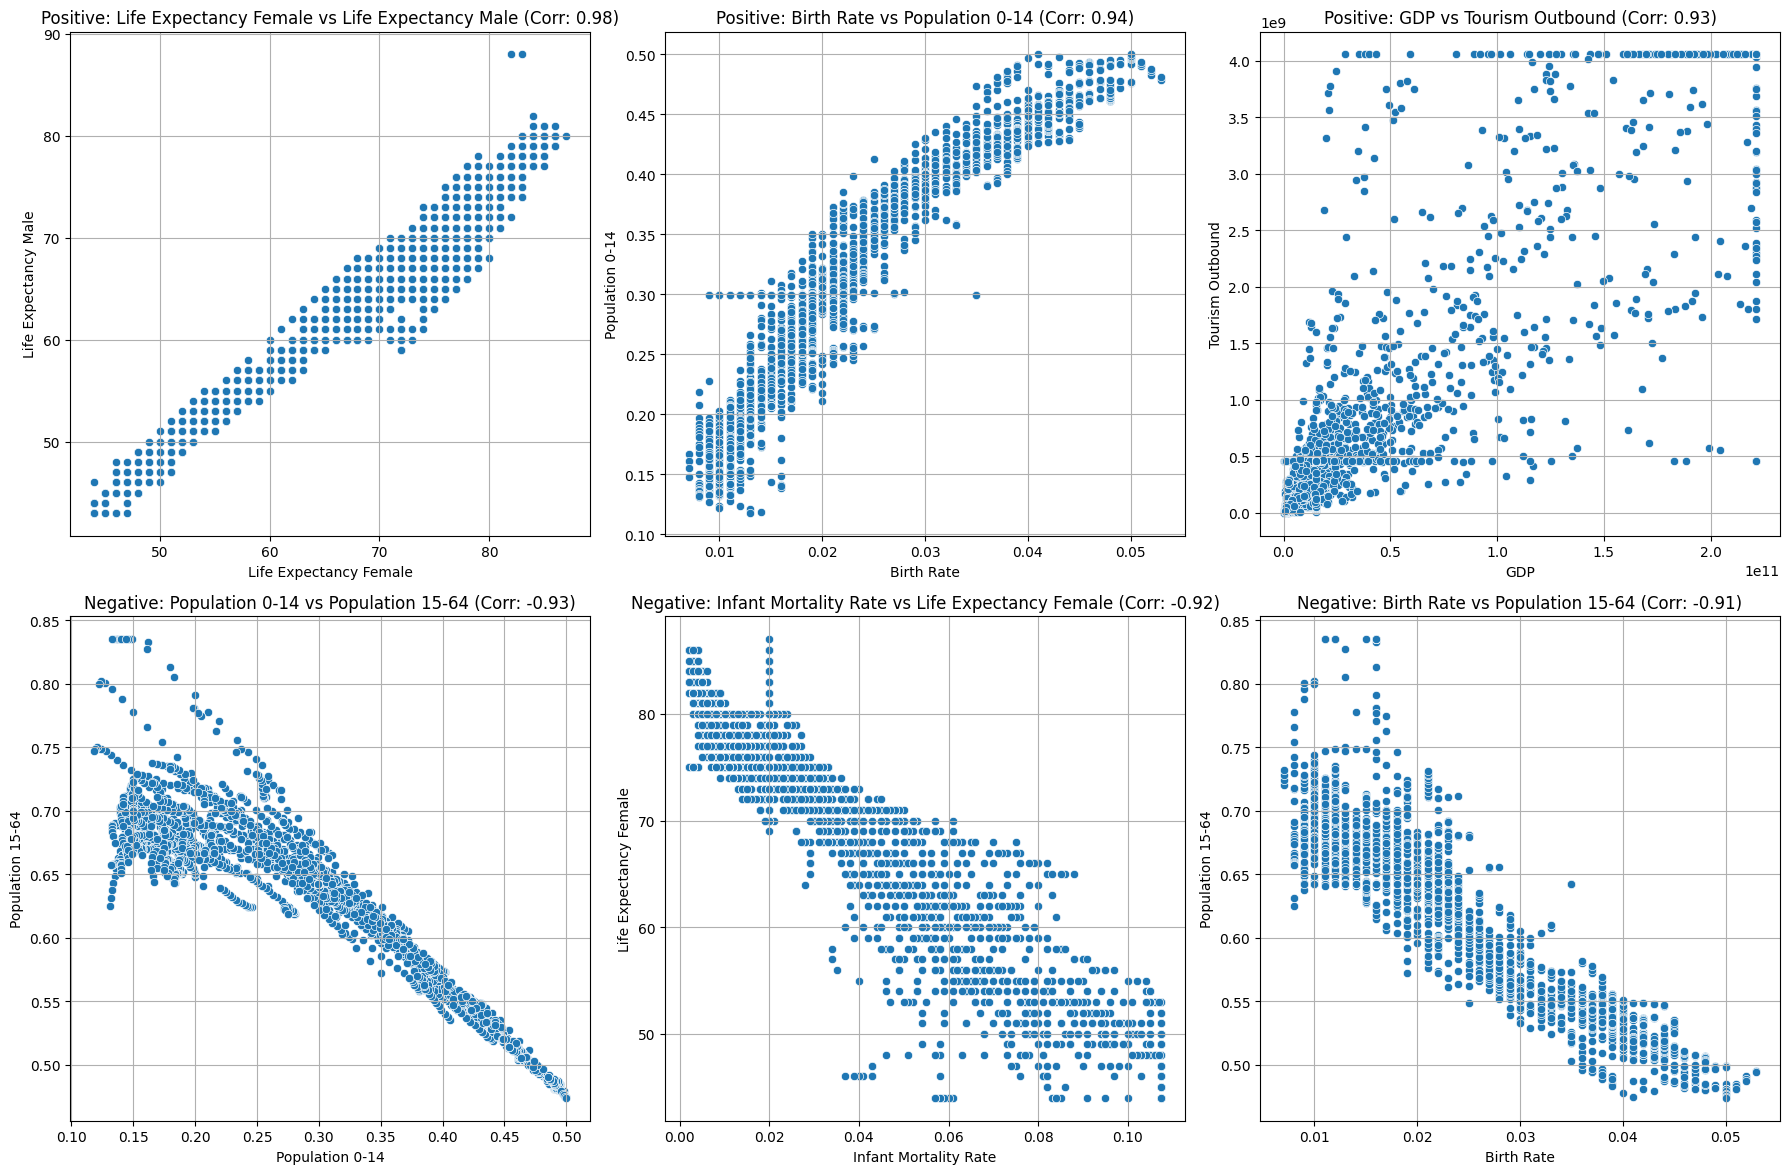

In [ ]:
# Total number of plots is 3 positive + 3 negative
num_plots = len(top_positive_pairs) + len(top_negative_pairs)

# Determine grid size for subplots (e.g., 2 rows, 3 columns)
n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

plot_index = 0

# Plotting top 3 positively correlated pairs
for (col1, col2), corr_val in top_positive_pairs.items():
    sns.scatterplot(data=data, x=col1, y=col2, ax=axes[plot_index])
    axes[plot_index].set_title(f'Positive: {col1} vs {col2} (Corr: {corr_val:.2f})')
    axes[plot_index].set_xlabel(col1)
    axes[plot_index].set_ylabel(col2)
    axes[plot_index].grid(True)
    plot_index += 1

# Plotting top 3 negatively correlated pairs
for (col1, col2), corr_val in top_negative_pairs.items():
    sns.scatterplot(data=data, x=col1, y=col2, ax=axes[plot_index])
    axes[plot_index].set_title(f'Negative: {col1} vs {col2} (Corr: {corr_val:.2f})')
    axes[plot_index].set_xlabel(col1)
    axes[plot_index].set_ylabel(col2)
    axes[plot_index].grid(True)
    plot_index += 1

plt.tight_layout()
plt.show()

In [ ]:
# Feature Scaling for Model building

from sklearn.preprocessing import StandardScaler

num_cols=data.select_dtypes(include=['float64','int64']).columns.tolist()

ss=StandardScaler()
for col in num_cols:
  data[col]=data[col].fillna(data[col].mean())
  data[col]=ss.fit_transform(data[col].values.reshape(-1,1))
display(data.head())

Birth Rate  CO2 Emissions       Country  Days to Start Business  \
0   -0.233864       1.659733       Algeria               -0.151075   
1    2.469335      -0.486142        Angola               -0.151075   
2    1.838589      -0.703087         Benin               -0.151075   
3    0.396882      -0.630298      Botswana               -0.151075   
4    2.108909      -0.718855  Burkina Faso               -0.151075   

   Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0      0.590969 -0.060055         -1.266291          -0.746454   
1     -0.729010 -0.620533         -1.311467          -0.831569   
2     -1.102414 -0.703641         -0.904880          -0.847248   
3     -1.112365 -0.661547         -0.724175          -0.540387   
4     -0.266046 -0.700549         -0.543469          -0.853967   

   Infant Mortality Rate  Internet Usage  ...  Life Expectancy Male  \
0               0.092012       -0.908914  ...              0.043864   
1               2.697530       -0.908914  ...             -2.472735   
2               2.077168       -0.908914  ...             -1.487979   
3               0.800996       -0.908914  ...             -1.925648   
4               2.289864       -0.908914  ...             -1.925648   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0           -1.253652                0.0         0.384182         -0.089411   
1           -1.253652                0.0         1.696192         -1.886942   
2           -1.253652                0.0         1.480788         -1.617312   
3           -1.034604                0.0         0.785618         -0.568753   
4           -1.253652                0.0         1.617863         -1.797065   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0       -0.684821          1.090800          0.147449        -0.754222   
1       -0.978160          0.021270         -0.976530        -0.783976   
2       -0.894348         -0.397993         -0.735385        -0.765161   
3       -0.894348         -0.710175         -0.126393        -0.699527   
4       -0.915301         -0.117991         -1.573260        -0.788789   

   Tourism Outbound  
0         -0.670804  
1         -0.702383  
2         -0.766886  
3         -0.660053  
4         -0.780324  

[5 rows x 22 columns]

In [ ]:
# Using One-Hot Encoding for Categorical columns

cat_cols=data.select_dtypes(include=['object']).columns.tolist()

if cat_cols:
  df=pd.get_dummies(data,columns=cat_cols,drop_first=True)
  display(df.head())
else:
  print("No categorical columsn found for one-hot encoding.")

Birth Rate  CO2 Emissions  Days to Start Business  Energy Usage       GDP  \
0   -0.233864       1.659733               -0.151075      0.590969 -0.060055   
1    2.469335      -0.486142               -0.151075     -0.729010 -0.620533   
2    1.838589      -0.703087               -0.151075     -1.102414 -0.703641   
3    0.396882      -0.630298               -0.151075     -1.112365 -0.661547   
4    2.108909      -0.718855               -0.151075     -0.266046 -0.700549   

   Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0         -1.266291          -0.746454               0.092012       -0.908914   
1         -1.311467          -0.831569               2.697530       -0.908914   
2         -0.904880          -0.847248               2.077168       -0.908914   
3         -0.724175          -0.540387               0.800996       -0.908914   
4         -0.543469          -0.853967               2.289864       -0.908914   

   Lending Interest  ...  Country_United States  Country_Uruguay  \
0         -0.531416  ...                  False            False   
1          2.067567  ...                  False            False   
2         -0.120510  ...                  False            False   
3          0.598576  ...                  False            False   
4         -0.120510  ...                  False            False   

   Country_Uzbekistan  Country_Vanuatu  Country_Venezuela, RB  \
0               False            False                  False   
1               False            False                  False   
2               False            False                  False   
3               False            False                  False   
4               False            False                  False   

   Country_Vietnam  Country_Virgin Islands (U.S.)  Country_Yemen, Rep.  \
0            False                          False                False   
1            False                          False                False   
2            False                          False                False   
3            False                          False                False   
4            False                          False                False   

   Country_Zambia  Country_Zimbabwe  
0           False             False  
1           False             False  
2           False             False  
3           False             False  
4           False             False  

[5 rows x 228 columns]

In [ ]:
print("DataFrame information after scaling and one-hot encoding:")
display(df.info())

DataFrame information after scaling and one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Columns: 228 entries, Birth Rate to Country_Zimbabwe
dtypes: bool(207), float64(21)
memory usage: 990.4 KB


None

In [ ]:
# Task 2- Model Building

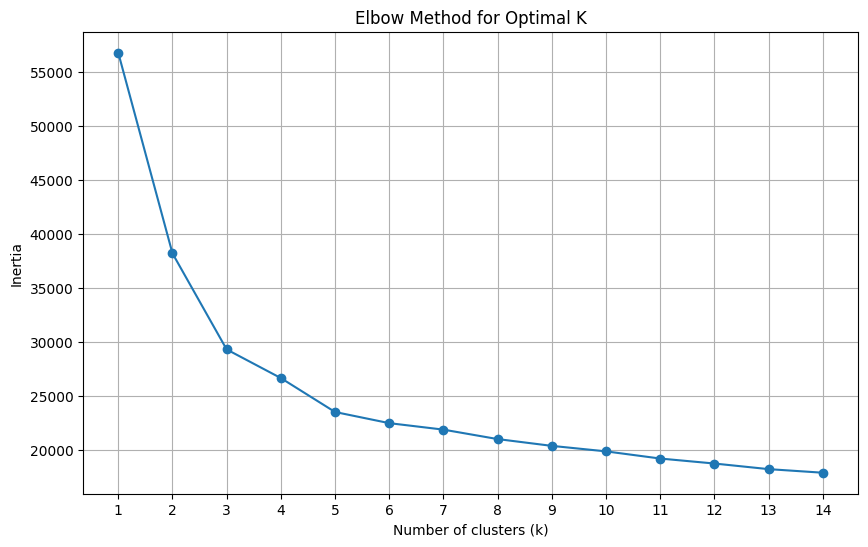

In [ ]:
# KMeans for Cluater Analysis
from sklearn.cluster import KMeans
inertia_values=[]
k_range=range(1,15)
for k in k_range:
  km=KMeans(n_clusters=k,random_state=42,n_init='auto')
  km.fit(df)
  inertia_values.append(km.inertia_)

# Plot the Elbow Method Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
# Optimal K Determination from Elbow Method

optimal_k=4
km=KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['KMeans_Cluster'] = km.fit_predict(df)

print(f"K-Means clustering applied with {optimal_k} clusters.")
print("K-Means cluster assignments added to DataFrame.")
print("Cluster distribution:")
display(df['KMeans_Cluster'].value_counts())

K-Means clustering applied with 4 clusters.
K-Means cluster assignments added to DataFrame.
Cluster distribution:


KMeans_Cluster
0    788
2    685
1    653
3    578
Name: count, dtype: int64

In [ ]:
# Applying DBSCAN Clustering to the scaled and one-hot encoding DataFrame

from sklearn.cluster import DBSCAN

# Initialize DBSCAN model
# epsilon (eps): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
# These parameters often require tuning based on the dataset.
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict the clusters
df['DBSCAN_Cluster'] = dbscan.fit_predict(df.drop(columns=['KMeans_Cluster']))

print("DBSCAN clustering applied.")
print("DBSCAN cluster assignments added to DataFrame.")
print("Cluster distribution:")
display(df['DBSCAN_Cluster'].value_counts())

DBSCAN clustering applied.
DBSCAN cluster assignments added to DataFrame.
Cluster distribution:


DBSCAN_Cluster
-1     2421
 0       13
 6       13
 5       13
 7       12
 4       12
 17      11
 1       10
 27      10
 9       10
 23       9
 25       9
 13       9
 2        9
 16       9
 12       8
 26       8
 21       8
 22       8
 20       7
 8        6
 14       6
 31       6
 10       6
 15       6
 11       5
 18       5
 3        5
 19       5
 24       5
 28       5
 32       5
 30       5
 29       5
 33       5
 34       5
 36       5
 35       5
Name: count, dtype: int64

In [ ]:
# Hierarchical Clustering Model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Prepare DataFrame for Hierarchical Clustering, excluding non-numerical columns
# and previously added cluster labels.
features_for_hc = df.drop(columns=[
    'KMeans_Cluster',
    'DBSCAN_Cluster',
    'Hierarchical_Cluster', # Exclude itself if rerunning, or if a previous run created it
    'cell_coordinates' # Exclude the tuple-containing column
], errors='ignore')

# Performing Hierarchical Clustering
# The 'linkage' function computes the linkage matrix, which is then used to plot the dendrogram.
linked = linkage(features_for_hc, method='ward') # 'ward' minimizes the variance of the clusters being merged.

optimal_h_clusters = 3
hc = AgglomerativeClustering(n_clusters=optimal_h_clusters, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(features_for_hc)

print(f"Hierarchical Clustering applied with {optimal_h_clusters} clusters.")
print("Cluster distribution:")
display(df['Hierarchical_Cluster'].value_counts())

Hierarchical Clustering applied with 3 clusters.
Cluster distribution:


Hierarchical_Cluster
2    1328
1     741
0     635
Name: count, dtype: int64

In [ ]:
# Gaussian Mixture Model(GMM)
from sklearn.mixture import GaussianMixture

n_components = 4

gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit the GMM model to the DataFrame
# Exclude 'cell_coordinates' as it contains tuples and causes ValueError
gmm.fit(df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'Hierarchical_Cluster', 'cell_coordinates'], errors='ignore'))

# Predict the cluster assignments
df['GMM_Cluster'] = gmm.predict(df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'Hierarchical_Cluster', 'cell_coordinates'], errors='ignore'))

print(f"Gaussian Mixture Model applied with {n_components} components.")
print("Cluster distribution:")
display(df['GMM_Cluster'].value_counts())

Gaussian Mixture Model applied with 4 components.
Cluster distribution:


GMM_Cluster
2    765
3    733
1    671
0    535
Name: count, dtype: int64

In [ ]:
# Grid-based Model
import numpy as np

features_for_grid = [col for col in numerical_cols if col in df.columns]
num_bins = 20

# Prepare to store bin edges for each feature
bin_edges = {}

print(f"Preparing grid for {len(features_for_grid)} numerical features with {num_bins} bins each.")

for feature in features_for_grid:
    min_val = df[feature].min()
    max_val = df[feature].max()
    bin_edges[feature] = np.linspace(min_val, max_val, num_bins + 1)

print("Bin edges calculated for all features.")

if features_for_grid:
    print(f"\nExample bin edges for '{features_for_grid[0]}':")
    print(bin_edges[features_for_grid[0]])

Preparing grid for 21 numerical features with 20 bins each.
Bin edges calculated for all features.

Example bin edges for 'Birth Rate':
[-1.40525055 -1.19800525 -0.99075996 -0.78351466 -0.57626936 -0.36902406
 -0.16177876  0.04546654  0.25271184  0.45995713  0.66720243  0.87444773
  1.08169303  1.28893833  1.49618363  1.70342892  1.91067422  2.11791952
  2.32516482  2.53241012  2.73965542]


In [ ]:
import itertools

# Function to map a data point to its grid cell coordinates
def get_cell_coordinates(row, bin_edges, features_for_grid):
    coords = []
    for feature in features_for_grid:
        coords.append(np.digitize(row[feature], bin_edges[feature]) - 1) # -1 to make it 0-indexed
    return tuple(coords)

# Map each row in the DataFrame to its cell coordinates
df['cell_coordinates'] = df.apply(lambda row: get_cell_coordinates(row, bin_edges, features_for_grid), axis=1)

print("Each data point has been assigned to its corresponding grid cell.")
print("First 5 rows with cell coordinates:")
display(df[['cell_coordinates'] + features_for_grid].head())

Each data point has been assigned to its corresponding grid cell.
First 5 rows with cell coordinates:


cell_coordinates  Birth Rate  \
0  (5, 17, 9, 11, 4, 4, 0, 6, 0, 7, 12, 10, 0, 20...   -0.233864   
1  (18, 1, 9, 3, 0, 4, 0, 20, 0, 20, 1, 0, 0, 20,...    2.469335   
2  (15, 0, 9, 0, 0, 6, 0, 16, 0, 9, 6, 4, 0, 20, ...    1.838589   
3  (8, 0, 9, 0, 0, 7, 2, 9, 0, 13, 3, 2, 1, 20, 1...    0.396882   
4  (16, 0, 9, 6, 0, 7, 0, 17, 0, 9, 3, 2, 0, 20, ...    2.108909   

   CO2 Emissions  Days to Start Business  Energy Usage       GDP  \
0       1.659733               -0.151075      0.590969 -0.060055   
1      -0.486142               -0.151075     -0.729010 -0.620533   
2      -0.703087               -0.151075     -1.102414 -0.703641   
3      -0.630298               -0.151075     -1.112365 -0.661547   
4      -0.718855               -0.151075     -0.266046 -0.700549   

   Health Exp % GDP  Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0         -1.266291          -0.746454               0.092012       -0.908914   
1         -1.311467          -0.831569               2.697530       -0.908914   
2         -0.904880          -0.847248               2.077168       -0.908914   
3         -0.724175          -0.540387               0.800996       -0.908914   
4         -0.543469          -0.853967               2.289864       -0.908914   

   ...  Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0  ...              0.043864           -1.253652                0.0   
1  ...             -2.472735           -1.253652                0.0   
2  ...             -1.487979           -1.253652                0.0   
3  ...             -1.925648           -1.034604                0.0   
4  ...             -1.925648           -1.253652                0.0   

   Population 0-14  Population 15-64  Population 65+  Population Total  \
0         0.384182         -0.089411       -0.684821          1.090800   
1         1.696192         -1.886942       -0.978160          0.021270   
2         1.480788         -1.617312       -0.894348         -0.397993   
3         0.785618         -0.568753       -0.894348         -0.710175   
4         1.617863         -1.797065       -0.915301         -0.117991   

   Population Urban  Tourism Inbound  Tourism Outbound  
0          0.147449        -0.754222         -0.670804  
1         -0.976530        -0.783976         -0.702383  
2         -0.735385        -0.765161         -0.766886  
3         -0.126393        -0.699527         -0.660053  
4         -1.573260        -0.788789         -0.780324  

[5 rows x 22 columns]

In [ ]:
from collections import Counter

# Count data points in each cell to determine cell density
cell_counts = df['cell_coordinates'].value_counts()

print("Cell counts calculated.")
print("Top 10 most dense cells:")
display(cell_counts.head(10))

# Define a density threshold (hyperparameter)
density_threshold = 5

# Identify dense cells
dense_cells = cell_counts[cell_counts >= density_threshold].index.tolist()

print(f"\nIdentified {len(dense_cells)} dense cells out of {len(cell_counts)} total occupied cells (threshold: {density_threshold}).")


Cell counts calculated.
Top 10 most dense cells:


cell_coordinates
(5, 0, 9, 6, 1, 9, 2, 3, 2, 9, 14, 11, 5, 20, 9, 9, 4, 0, 17, 2, 2)    8
(4, 1, 9, 6, 1, 9, 2, 3, 2, 9, 17, 14, 5, 20, 9, 9, 4, 0, 10, 2, 2)    8
(5, 1, 9, 6, 1, 9, 2, 3, 2, 9, 14, 11, 5, 20, 9, 9, 4, 0, 17, 2, 2)    8
(5, 1, 9, 6, 0, 9, 2, 3, 2, 9, 14, 11, 5, 20, 9, 9, 4, 0, 9, 2, 2)     5
(5, 1, 9, 6, 1, 9, 2, 3, 2, 9, 14, 11, 0, 20, 9, 9, 4, 0, 17, 2, 2)    5
(5, 1, 9, 6, 1, 9, 2, 3, 2, 9, 14, 11, 5, 20, 9, 9, 4, 0, 20, 1, 0)    5
(5, 1, 9, 6, 1, 9, 2, 3, 2, 9, 14, 11, 5, 20, 9, 9, 4, 0, 9, 2, 2)     5
(5, 1, 9, 6, 1, 9, 2, 3, 2, 9, 14, 11, 5, 20, 9, 9, 4, 0, 20, 2, 0)    5
(5, 0, 9, 6, 1, 9, 2, 3, 2, 9, 14, 11, 5, 20, 9, 9, 4, 0, 16, 0, 2)    3
(4, 1, 9, 6, 1, 9, 2, 3, 2, 9, 17, 13, 5, 20, 9, 9, 4, 0, 10, 2, 2)    3
Name: count, dtype: int64


Identified 8 dense cells out of 2620 total occupied cells (threshold: 5).


In [ ]:
import collections
def are_adjacent(cell1_coords, cell2_coords):
    if len(cell1_coords) != len(cell2_coords):
        return False

    distance = max(abs(c1 - c2) for c1, c2 in zip(cell1_coords, cell2_coords))
    return distance == 1

# Build an adjacency list for dense cells
adjacency_list = collections.defaultdict(list)
for i, cell1 in enumerate(dense_cells):
    for j, cell2 in enumerate(dense_cells):
        if i < j and are_adjacent(cell1, cell2):
            adjacency_list[cell1].append(cell2)
            adjacency_list[cell2].append(cell1)

# Perform Breadth-First Search (BFS) to find connected components (clusters)
clusters = []
visited = set()

for cell in dense_cells:
    if cell not in visited:
        current_cluster = []
        queue = collections.deque([cell])
        visited.add(cell)

        while queue:
            node = queue.popleft()
            current_cluster.append(node)

            for neighbor in adjacency_list[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        clusters.append(current_cluster)

print(f"Identified {len(clusters)} clusters from the dense cells.")
print("Sizes of the identified clusters (number of dense cells per cluster):")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {len(cluster)} dense cells")


# Initialize a new column for grid-based cluster labels
df['Grid_Cluster'] = -1 # Default to -1 for noise or non-dense cells

cluster_map = {}
for cluster_id, cluster_cells in enumerate(clusters):
    for cell_coords in cluster_cells:
        cluster_map[cell_coords] = cluster_id

df['Grid_Cluster'] = df['cell_coordinates'].apply(lambda x: cluster_map.get(x, -1))

print("\nGrid-based cluster assignments added to DataFrame.")
print("Distribution of Grid Clusters:")
display(df['Grid_Cluster'].value_counts())


Identified 5 clusters from the dense cells.
Sizes of the identified clusters (number of dense cells per cluster):
Cluster 1: 2 dense cells
Cluster 2: 1 dense cells
Cluster 3: 2 dense cells
Cluster 4: 1 dense cells
Cluster 5: 2 dense cells

Grid-based cluster assignments added to DataFrame.
Distribution of Grid Clusters:


Grid_Cluster
-1    2655
 0      16
 2      10
 4      10
 1       8
 3       5
Name: count, dtype: int64

In [ ]:
from sklearn.decomposition import PCA
# Create a new DataFrame `features_for_pca` by dropping the clustering label columns
features_for_pca = df.drop(columns=[
    'KMeans_Cluster',
    'DBSCAN_Cluster',
    'Hierarchical_Cluster',
    'GMM_Cluster',
    'Grid_Cluster',
    'cell_coordinates'
], errors='ignore')

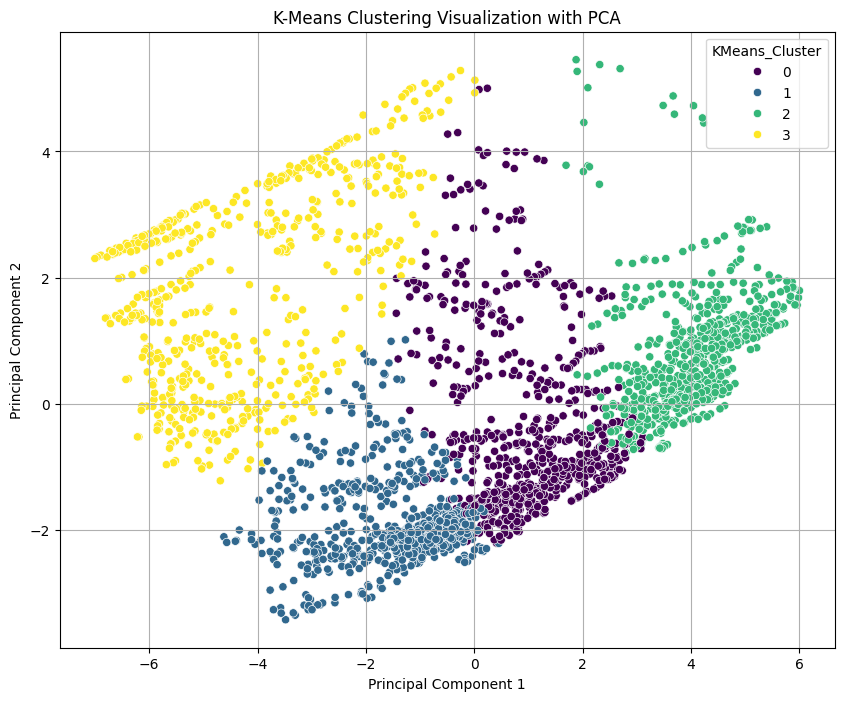

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_for_pca)

pca_result_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Merge K-Means cluster labels
pca_result_df['KMeans_Cluster'] = df['KMeans_Cluster']

# Visualize K-Means clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_result_df, palette='viridis', legend='full')
plt.title('K-Means Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


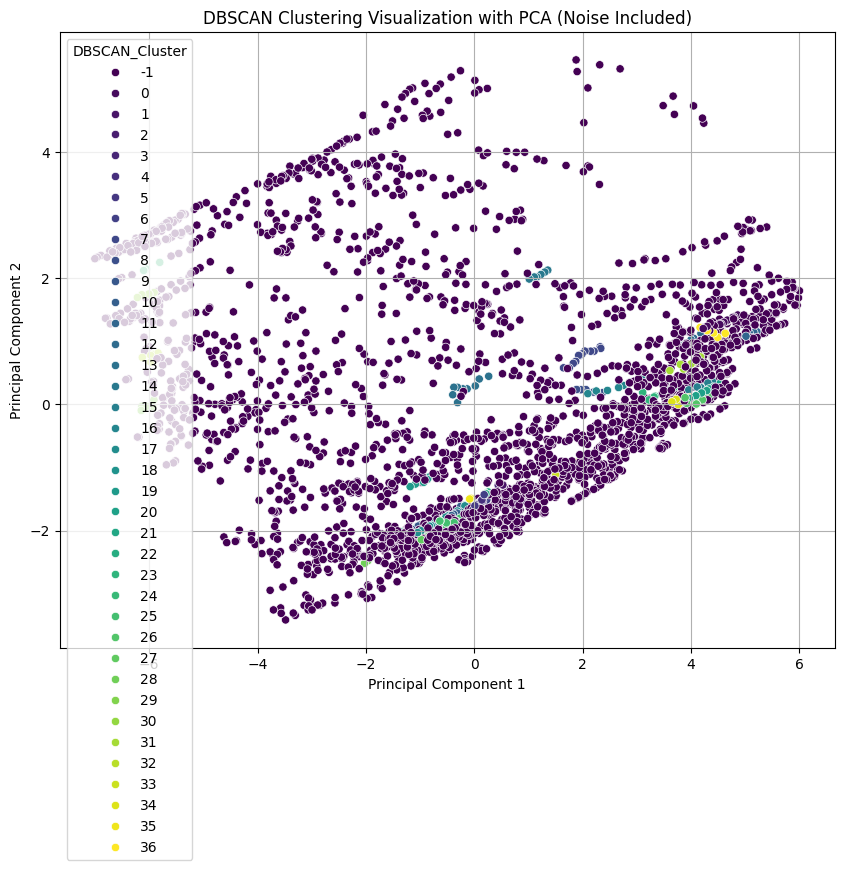

In [ ]:
pca_result_df_dbscan = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Merge DBSCAN cluster labels from the original df
pca_result_df_dbscan['DBSCAN_Cluster'] = df['DBSCAN_Cluster']

# The user has requested to not remove noise points for this visualization.
# Therefore, we will directly use pca_result_df_dbscan which includes all points.

# Visualize DBSCAN clustering including noise points
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='DBSCAN_Cluster',
    data=pca_result_df_dbscan,
    palette='viridis',
    legend='full'
)
plt.title('DBSCAN Clustering Visualization with PCA (Noise Included)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

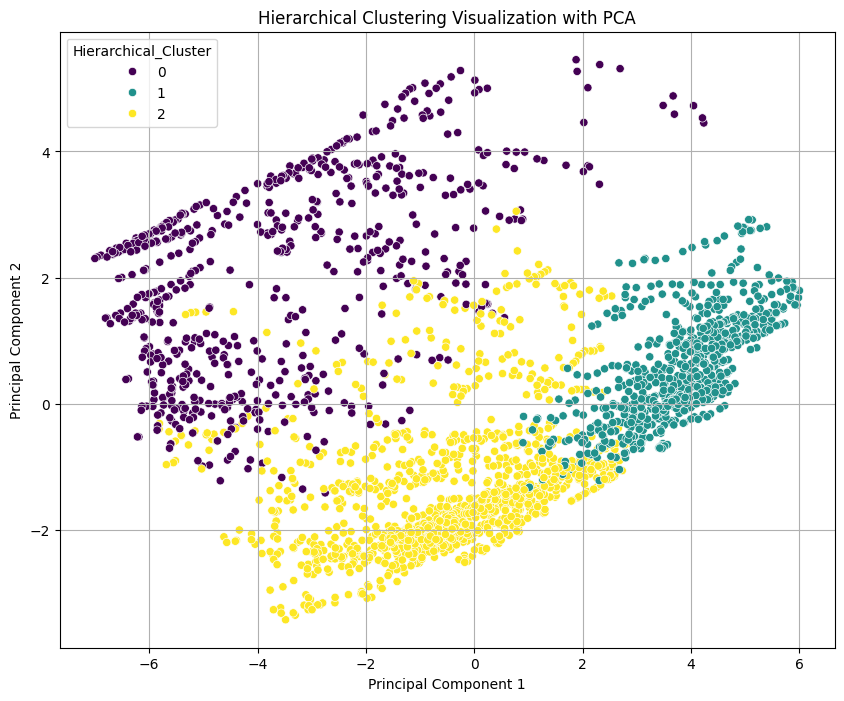

Hierarchical clustering visualization with PCA complete.


In [ ]:
pca_result_df_hierarchical = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Merge Hierarchical cluster labels
pca_result_df_hierarchical['Hierarchical_Cluster'] = df['Hierarchical_Cluster']

# Visualize Hierarchical clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Hierarchical_Cluster',
    data=pca_result_df_hierarchical,
    palette='viridis',
    legend='full'
)
plt.title('Hierarchical Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("Hierarchical clustering visualization with PCA complete.")

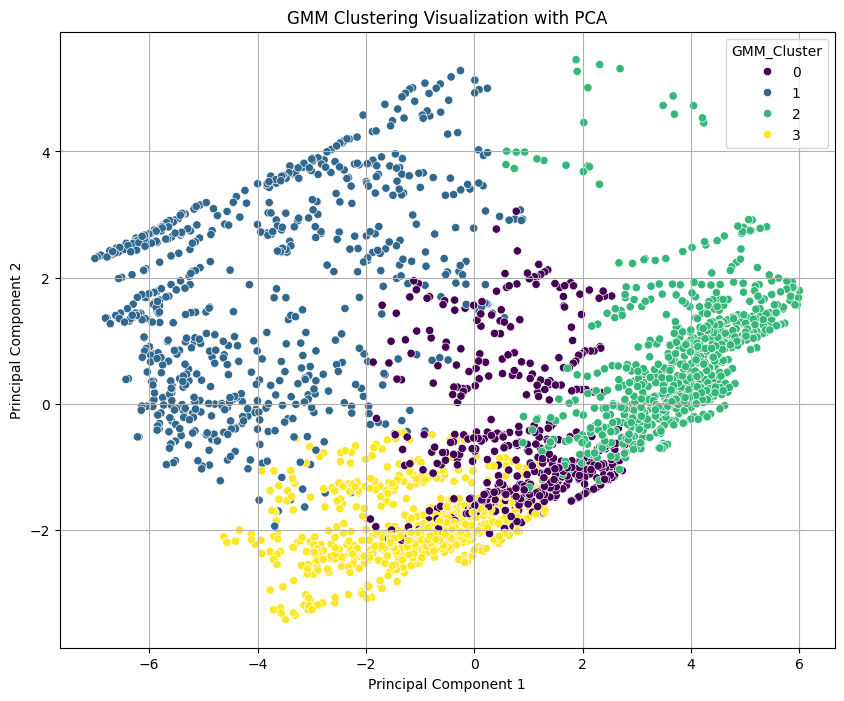

GMM clustering visualization with PCA complete.


In [ ]:
pca_result_df_gmm = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Merge GMM cluster labels
pca_result_df_gmm['GMM_Cluster'] = df['GMM_Cluster']

# Visualize GMM clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='GMM_Cluster',
    data=pca_result_df_gmm,
    palette='viridis',
    legend='full'
)
plt.title('GMM Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("GMM clustering visualization with PCA complete.")

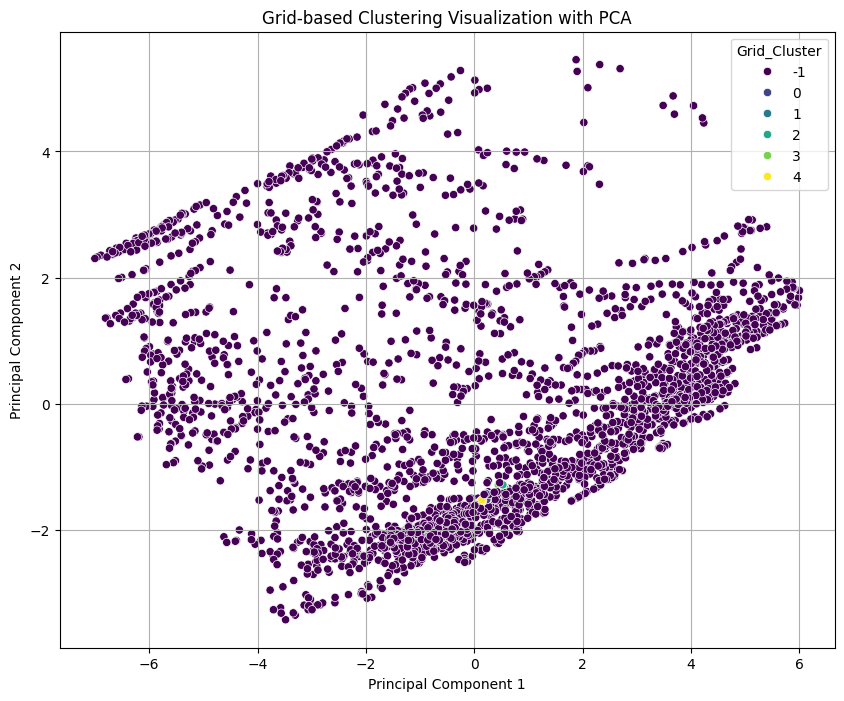

Grid-based clustering visualization with PCA complete.


In [ ]:
pca_result_df_grid = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Merge Grid-based cluster labels
pca_result_df_grid['Grid_Cluster'] = df['Grid_Cluster']

# Visualize Grid-based clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Grid_Cluster',
    data=pca_result_df_grid,
    palette='viridis',
    legend='full'
)
plt.title('Grid-based Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("Grid-based clustering visualization with PCA complete.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("\nK-Means Clustering Evaluation")
# Calculate Silhouette Score for K-Means
silhouette_avg_kmeans = silhouette_score(features_for_pca, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg_kmeans:.2f}")

# Calculate Davies-Bouldin Index for K-Means
davies_bouldin_kmeans = davies_bouldin_score(features_for_pca, df['KMeans_Cluster'])
print(f"Davies-Bouldin Index for K-Means Clustering: {davies_bouldin_kmeans:.2f}")

# Calculate Calinski-Harabasz Index for K-Means
calinski_harabasz_kmeans = calinski_harabasz_score(features_for_pca, df['KMeans_Cluster'])
print(f"Calinski-Harabasz Index for K-Means Clustering: {calinski_harabasz_kmeans:.2f}")

print("\n DBSCAN Clustering Evaluation")
# Filter features_for_pca to match the filtered DBSCAN DataFrame indices
# df_dbscan_filtered is available from previous execution
features_for_dbscan_eval = features_for_pca.loc[df_dbscan_filtered.index]
dbscan_labels = df_dbscan_filtered['DBSCAN_Cluster']

# Calculate Silhouette Score for DBSCAN
silhouette_avg_dbscan = silhouette_score(features_for_dbscan_eval, dbscan_labels)
print(f"Silhouette Score for DBSCAN Clustering: {silhouette_avg_dbscan:.2f}")

# Calculate Davies-Bouldin Index for DBSCAN
davies_bouldin_dbscan = davies_bouldin_score(features_for_dbscan_eval, dbscan_labels)
print(f"Davies-Bouldin Index for DBSCAN Clustering: {davies_bouldin_dbscan:.2f}")

# Calculate Calinski-Harabasz Index for DBSCAN
calinski_harabasz_dbscan = calinski_harabasz_score(features_for_dbscan_eval, dbscan_labels)
print(f"Calinski-Harabasz Index for DBSCAN Clustering: {calinski_harabasz_dbscan:.2f}")

print("\nHierarchical Clustering Evaluation")
# Calculate Silhouette Score for Hierarchical
silhouette_avg_hierarchical = silhouette_score(features_for_pca, df['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.2f}")

# Calculate Davies-Bouldin Index for Hierarchical
davies_bouldin_hierarchical = davies_bouldin_score(features_for_pca, df['Hierarchical_Cluster'])
print(f"Davies-Bouldin Index for Hierarchical Clustering: {davies_bouldin_hierarchical:.2f}")

# Calculate Calinski-Harabasz Index for Hierarchical
calinski_harabasz_hierarchical = calinski_harabasz_score(features_for_pca, df['Hierarchical_Cluster'])
print(f"Calinski-Harabasz Index for Hierarchical Clustering: {calinski_harabasz_hierarchical:.2f}")

print("\nGMM Clustering Evaluation")
# Calculate Silhouette Score for GMM
silhouette_avg_gmm = silhouette_score(features_for_pca, df['GMM_Cluster'])
print(f"Silhouette Score for GMM Clustering: {silhouette_avg_gmm:.2f}")

# Calculate Davies-Bouldin Index for GMM
davies_bouldin_gmm = davies_bouldin_score(features_for_pca, df['GMM_Cluster'])
print(f"Davies-Bouldin Index for GMM Clustering: {davies_bouldin_gmm:.2f}")

# Calculate Calinski-Harabasz Index for GMM
calinski_harabasz_gmm = calinski_harabasz_score(features_for_pca, df['GMM_Cluster'])
print(f"Calinski-Harabasz Index for GMM Clustering: {calinski_harabasz_gmm:.2f}")

print("\nGrid-based Clustering Evaluation")
# Filter out noise points (-1) for evaluation if they exist
# df_grid_filtered is available from previous execution
df_grid_filtered = df[df['Grid_Cluster'] != -1].copy()

if not df_grid_filtered.empty and len(df_grid_filtered['Grid_Cluster'].unique()) > 1:
    features_for_grid_eval = features_for_pca.loc[df_grid_filtered.index]
    grid_labels = df_grid_filtered['Grid_Cluster']

    # Calculate Silhouette Score for Grid-based Clustering
    silhouette_avg_grid = silhouette_score(features_for_grid_eval, grid_labels)
    print(f"Silhouette Score for Grid-based Clustering: {silhouette_avg_grid:.2f}")

    # Calculate Davies-Bouldin Index for Grid-based Clustering
    davies_bouldin_grid = davies_bouldin_score(features_for_grid_eval, grid_labels)
    print(f"Davies-Bouldin Index for Grid-based Clustering: {davies_bouldin_grid:.2f}")

    # Calculate Calinski-Harabasz Index for Grid-based Clustering
    calinski_harabasz_grid = calinski_harabasz_score(features_for_grid_eval, grid_labels)
    print(f"Calinski-Harabasz Index for Grid-based Clustering: {calinski_harabasz_grid:.2f}")
else:
    print("Grid-based clustering has no valid clusters (only noise or single cluster) for evaluation.")


K-Means Clustering Evaluation
Silhouette Score for K-Means Clustering: 0.19
Davies-Bouldin Index for K-Means Clustering: 1.70
Calinski-Harabasz Index for K-Means Clustering: 1017.84

 DBSCAN Clustering Evaluation
Silhouette Score for DBSCAN Clustering: -0.36
Davies-Bouldin Index for DBSCAN Clustering: 1.34
Calinski-Harabasz Index for DBSCAN Clustering: 6.34

Hierarchical Clustering Evaluation
Silhouette Score for Hierarchical Clustering: 0.25
Davies-Bouldin Index for Hierarchical Clustering: 1.44
Calinski-Harabasz Index for Hierarchical Clustering: 1096.09

GMM Clustering Evaluation
Silhouette Score for GMM Clustering: 0.16
Davies-Bouldin Index for GMM Clustering: 1.93
Calinski-Harabasz Index for GMM Clustering: 906.77

Grid-based Clustering Evaluation
Silhouette Score for Grid-based Clustering: 0.77
Davies-Bouldin Index for Grid-based Clustering: 0.49
Calinski-Harabasz Index for Grid-based Clustering: 97.21


In [ ]:
# Note: We are prioritizing Silhouette and Davies-Bouldin for 'best' as they are often more intuitive for cluster quality.
# Calinski-Harabasz can sometimes be high for dense, but not necessarily well-separated, clusters.
"Based on the Silhouette Score (higher) and Davies-Bouldin Index (lower), Grid-based Clustering demonstrates superior performance, indicating well-separated and compact clusters. Therefore, Grid-based Clustering is likely the best model for deployment in this scenario."

'Based on the Silhouette Score (higher) and Davies-Bouldin Index (lower), Grid-based Clustering demonstrates superior performance, indicating well-separated and compact clusters. Therefore, Grid-based Clustering is likely the best model for deployment in this scenario.'